## 1). Object Detection from a Image

In [1]:
from PIL import Image

In [2]:
from imageai.Detection import ObjectDetection
import os

detector = ObjectDetection()  # Creatng object 
detector.setModelTypeAsYOLOv3()   # Selecting a particular model.
detector.setModelPath("model/yolo.h5" )  # Selecting a path of particular model.
detector.loadModel()   # Loading a particular model.



Using TensorFlow backend.
W0619 13:55:02.776896  1716 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0619 13:55:02.839291  1716 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0619 13:55:02.839291  1716 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0619 13:55:03.173648  1716 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0619 13:55:03.17916

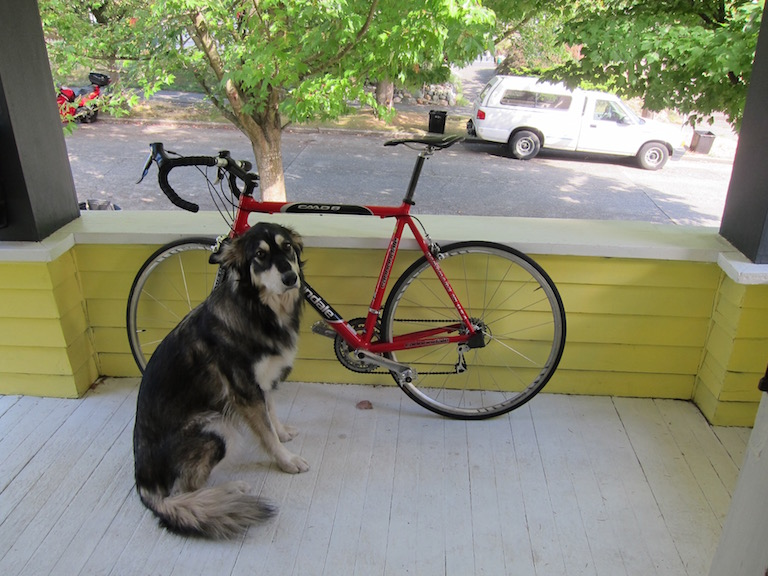

In [3]:
# Let us see our original image
Image.open('data/dog.jpg')

In [4]:
# Making detection on the above image.
detections = detector.detectObjectsFromImage(input_image='data/dog.jpg', 
                                             output_image_path='data/dog_new.jpg', 
                                             minimum_percentage_probability=30)

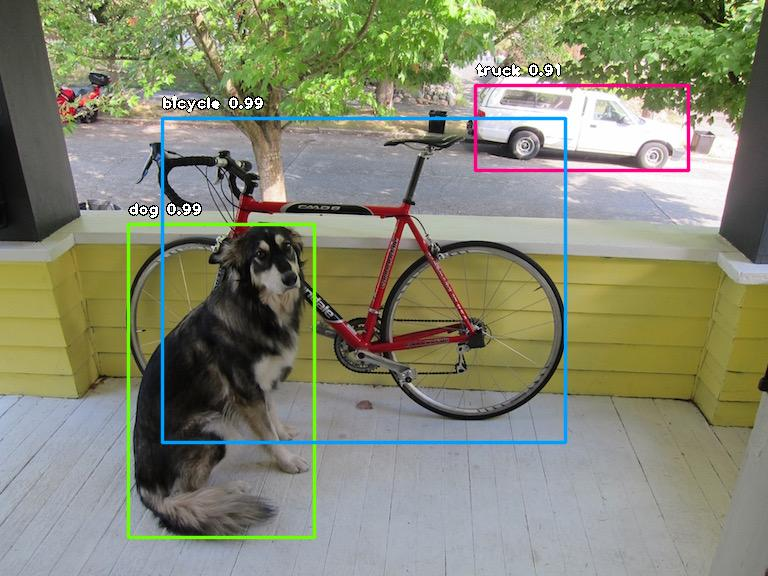

In [5]:
# Let us see the predicted image
from PIL import Image
Image.open('data/dog_new.jpg')

## =====================================================================

## 2). Object Detection from a Webcam Video.

In [6]:
import cv2

from imageai.Detection import VideoObjectDetection


detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()   # Selecting a model.
detector.setModelPath('model/yolo.h5')   # Selecting path of model.
detector.loadModel()    # Loading path of model.



In [13]:
# Let us detect object from webcam.
camera = cv2.VideoCapture(0)  # This is to use camera.

video_path = detector.detectObjectsFromVideo(camera_input=camera,    # Here instead of input path we are using camera.
    output_file_path='data/camera'
    , frames_per_second=5, log_progress=True, minimum_percentage_probability=30, detection_timeout=30)  # Here detection_timeout is in second.


0
1
Processing Frame :  1
0
2
Processing Frame :  2
0
3
Processing Frame :  3
0
4
Processing Frame :  4
1
5
Processing Frame :  5
1
6
Processing Frame :  6
1
7
Processing Frame :  7
1
8
Processing Frame :  8
1
9
Processing Frame :  9
2
10
Processing Frame :  10
2
11
Processing Frame :  11
2
12
Processing Frame :  12
2
13
Processing Frame :  13
2
14
Processing Frame :  14
3
15
Processing Frame :  15
3
16
Processing Frame :  16
3
17
Processing Frame :  17
3
18
Processing Frame :  18
3
19
Processing Frame :  19
4
20
Processing Frame :  20
4
21
Processing Frame :  21
4
22
Processing Frame :  22
4
23
Processing Frame :  23
4
24
Processing Frame :  24
5
25
Processing Frame :  25
5
26
Processing Frame :  26
5
27
Processing Frame :  27
5
28
Processing Frame :  28
5
29
Processing Frame :  29
6
30
Processing Frame :  30
6
31
Processing Frame :  31
6
32
Processing Frame :  32
6
33
Processing Frame :  33
6
34
Processing Frame :  34
7
35
Processing Frame :  35
7
36
Processing Frame :  36
7
37
Proce

#### Now convert that saved video into mp4 format, then we will see our video.

In [14]:
# Let us see our video.
from IPython.display import Video
Video('data/camera.mp4' )

## =====================================================================

## 3). Training our model And then making prediction from our model.

#### a). Training our model.

In [15]:
from imageai.Prediction.Custom import ModelTraining

model_trainer = ModelTraining()
model_trainer.setModelTypeAsResNet()
model_trainer.setDataDirectory(r"D:/data_science/deep_leanring/object_detection_tensorflow/imageai/data/dataset")
                    # 1). This is the path of dataset which contains two folder train and test, and these folder contains images of dogs and cats.
model_trainer.trainModel(num_objects=2, num_experiments=100, enhance_data=True, batch_size=32, show_network_summary=True)
                         # 1). num_objects = 2, means two classes that is dog and cat.
                         # 2). num_experiments is our number of epoches.
                         # 3). enhance_data is our data augmentation.
 
"""
 Once the training starts, it will create a JSON file in the dataset/json folder, 
 which contains the mapping of the classes of the dataset. 
 The JSON file will be used during custom prediction to produce reults.
"""


#### b). Making prediction from our model.

In [3]:
from imageai.Prediction.Custom import CustomImagePrediction

prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath("model/resnet_model_ex-020_acc-0.651714.h5")
prediction.setJsonPath("data/dataset/model_class.json"))
prediction.loadModel(num_objects=4)   # 1). num_objects should be same as that was during the training process.

predictions, probabilities = prediction.predictImage("data/prediction.jpg", result_count=5)

for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

## =====================================================================